# Importing libraries


In [4]:

import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline

# Read csv file using pandas

In [5]:
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

# Data frame information

In [32]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Data

In [7]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# top scorers of all time

In [33]:

top_scorers=deliveries.groupby(['batsman'])['batsman_runs'].sum()

top_scorers.sort_values(ascending=False).head(5)


batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

# expensive bowlers of all time

In [9]:
expensive_bowlers=deliveries.groupby(['bowler'])['batsman_runs'].sum()

expensive_bowlers.sort_values(ascending=False).head(5)

bowler
PP Chawla          4022
Harbhajan Singh    3880
A Mishra           3727
DJ Bravo           3532
UT Yadav           3421
Name: batsman_runs, dtype: int64

# share of various dismissals in particular season


In [35]:
merged=pd.merge(left=deliveries, right=matches, how='outer', left_on="match_id", right_on="id")
dismissals=merged.groupby(['season','dismissal_kind'])['dismissal_kind'].agg(dismissal_kind='count')
dismissals.rename(columns={'dismissal_kind':'count'},inplace=True)
pd.set_option ('display.max_columns', None)
print(dismissals.to_string())

                              count
season dismissal_kind              
2008   bowled                   131
       caught                   400
       caught and bowled         21
       hit wicket                 2
       lbw                       37
       retired hurt               1
       run out                   85
       stumped                   13
2009   bowled                   112
       caught                   415
       caught and bowled         18
       hit wicket                 1
       lbw                       47
       run out                   76
       stumped                   29
2010   bowled                   141
       caught                   395
       caught and bowled         17
       lbw                       41
       retired hurt               2
       run out                   93
       stumped                   36
2011   bowled                   156
       caught                   472
       caught and bowled         29
       lbw                  

In [11]:
stats2017=merged[merged['season']==2017]
dismissals2017=stats2017.groupby(['season','dismissal_kind'])['dismissal_kind'].agg(dismissal_kind='count')
dismissals2017.rename(columns={'dismissal_kind':'count'},inplace=True)
pd.set_option ('display.max_columns', None)
print(dismissals2017.to_string())

                          count
season dismissal_kind          
2017   bowled               131
       caught               419
       caught and bowled     24
       hit wicket             1
       lbw                   56
       retired hurt           1
       run out               58
       stumped               21


In [12]:
exp_vals=[131,419,24,1,56,1,58,21]
exp_labels=['bowled','caught','caught and bowled','hit wicket','lbw','retired hurt','run out','stumped']


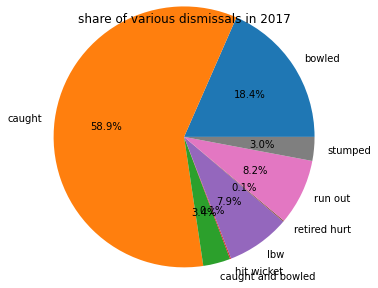

In [13]:
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels,radius=1.5,autopct='%0.1f%%')
plt.title("share of various dismissals in 2017")
plt.show()

In [44]:
#


# share of tie and noresult matches in a particular season

In [14]:

q4_df=matches[matches['result']!='normal']
q4_df=q4_df.groupby(['season','result'])['result'].agg(count='count')
q4_df

count
season result          
2009   tie            1
2010   tie            1
2011   no result      1
2013   tie            2
2014   tie            1
2015   no result      2
       tie            1
2017   tie            1
2019   no result      1
       tie            2

# share of sixes,fours,threes,twos,ones in total runs during particular season



In [36]:
deliveries_new =deliveries[deliveries['batsman_runs']!= 0] 
deliveries_new =deliveries_new[deliveries_new['batsman_runs']!= 5]
deliveries_new =deliveries_new[deliveries_new['batsman_runs']!= 7]
q5_df= pd.merge(left= deliveries_new, right= matches, how="inner", left_on='match_id', right_on='id')
q5_df= q5_df.groupby(['season', 'batsman_runs'])['batsman_runs'].agg(batsman_runs='count')
q5_df.rename(columns= {'batsman_runs':'count'}, inplace= True)
pd.set_option('display.max_rows',None)
display(q5_df)

count
season batsman_runs       
2008   1              4654
       2               729
       3                39
       4              1703
       6               623
2009   1              4861
       2               994
       3                60
       4              1321
       6               508
2010   1              5411
       2               910
       3                50
       4              1709
       6               587
2011   1              6203
       2              1021
       3                50
       4              1916
       6               639
2012   1              6840
       2              1113
       3                58
       4              1911
       6               733
2013   1              6589
       2              1179
       3                71
       4              2054
       6               681
2014   1              5190
       2              1009
       3                56
       4              1563
       6               715
2015   1              4928
       2               880
       3                46
       4              1611
       6               692
2016   1              5434
       2              1007
       3                43
       4              1633
       6               639
2017   1              5387
       2               863
       3                36
       4              1612
       6               706
2018   1              6083
       2               855
       3                34
       4              1674
       6               869
2019   1              5943
       2               911
       3                44
       4              1685
       6               778

# performance of teams in particular season

In [21]:

m=matches.groupby('season')['winner'].value_counts()
tm1 = matches[["id", "season","team1","winner"]]
tm1.columns = ['id', 'season', 'team','winner']
tm2 = matches[["id", "season","team2","winner"]]
tm2.columns = ['id', 'season', 'team','winner']
tms=pd.concat([tm1, tm2], sort=True)
tmsr=pd.concat([tm1, tm2], sort=True)
tmsr['result'] =(tmsr['team']==(tmsr['winner']))
tmsr.loc[tmsr["result"] == True, "result"] = "won"
tmsr.loc[tmsr["result"] == False, "result"] = "Lost"
m=tmsr.groupby(['season','result'])['team'].value_counts().reset_index(name='count')


result  season                         team  Lost  won
0         2008          Chennai Super Kings     7    9
1         2008              Deccan Chargers    12    2
2         2008             Delhi Daredevils     7    7
3         2008              Kings XI Punjab     5   10
4         2008        Kolkata Knight Riders     7    6
5         2008               Mumbai Indians     7    7
6         2008             Rajasthan Royals     3   13
7         2008  Royal Challengers Bangalore    10    4
8         2009          Chennai Super Kings     6    8
9         2009              Deccan Chargers     7    9
10        2009             Delhi Daredevils     5   10
11        2009              Kings XI Punjab     7    7
12        2009        Kolkata Knight Riders    10    3
13        2009               Mumbai Indians     8    5
14        2009             Rajasthan Royals     7    6
15        2009  Royal Challengers Bangalore     7    9
16        2010          Chennai Super Kings     7    9
17        

season
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

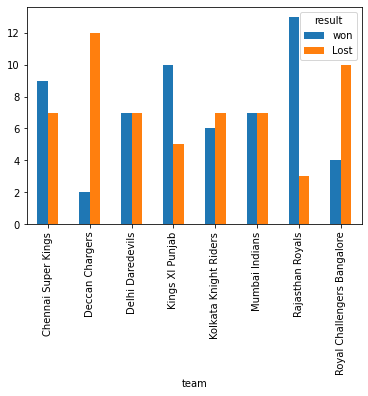

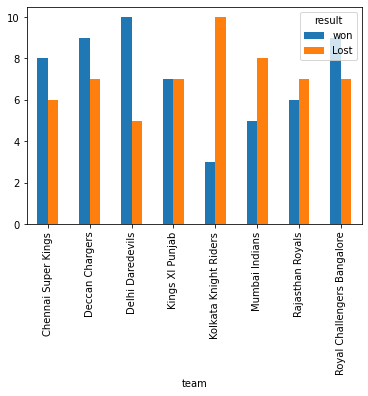

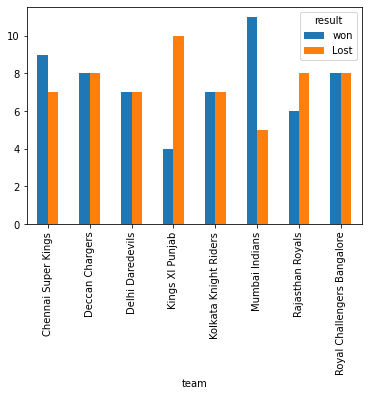

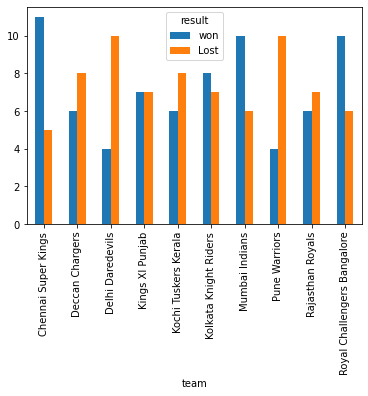

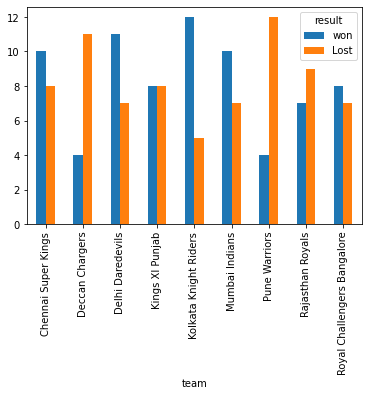

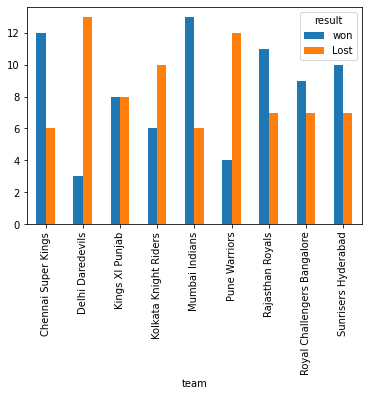

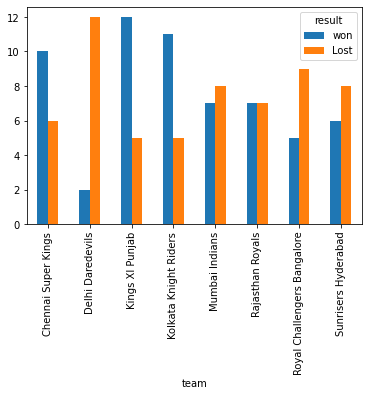

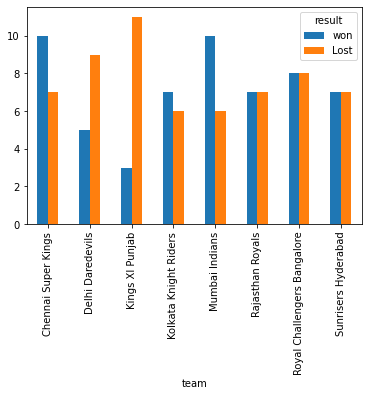

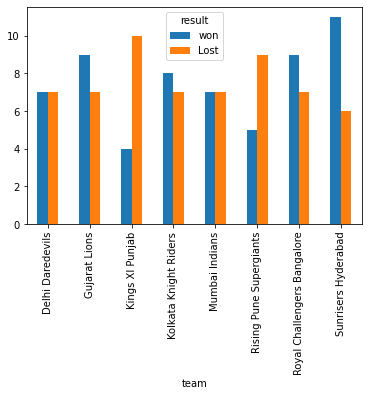

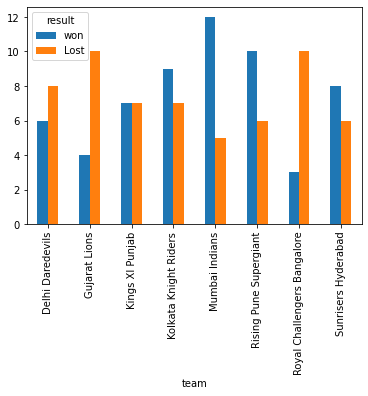

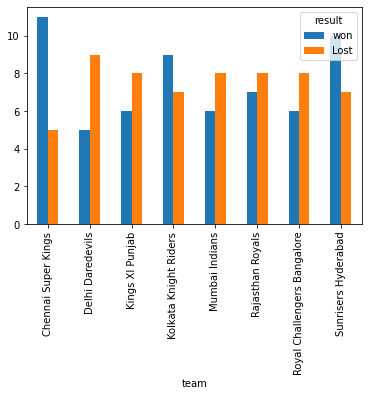

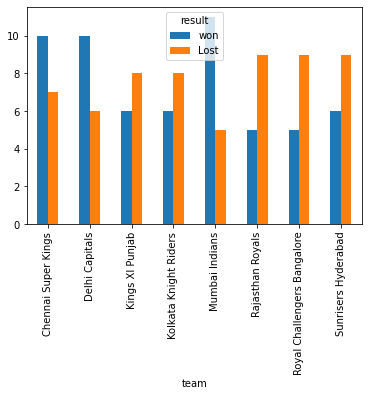

In [20]:
df_pivot = pd.pivot_table(m, 
                          index = ['season', 'team'], 
                          columns = 'result', 
                          values = 'count')
df_pivot.reset_index(inplace=True)
print(df_pivot.to_string())
df_pivot.groupby("season").plot(x="team", y=["won", "Lost"], kind="bar")

# bowlers who bowled super overs,their team, and result of the match

In [27]:
merged=merged[merged['is_super_over']==1]
merged[['season','bowler','bowling_team','winner']].drop_duplicates(subset="bowler").sort_values("season")

,season,bowler,bowling_team,winner
29279,2009,Kamran Khan,Rajasthan Royals,Rajasthan Royals
29286,2009,BAW Mendis,Kolkata Knight Riders,Rajasthan Royals
44819,2010,J Theron,Kings XI Punjab,Kings XI Punjab
44824,2010,M Muralitharan,Chennai Super Kings,Kings XI Punjab
91904,2013,R Vinay Kumar,Royal Challengers Bangalore,Sunrisers Hyderabad
91911,2013,DW Steyn,Sunrisers Hyderabad,Sunrisers Hyderabad
95073,2013,UT Yadav,Delhi Daredevils,Royal Challengers Bangalore
95079,2013,R Rampaul,Royal Challengers Bangalore,Royal Challengers Bangalore
112918,2014,SP Narine,Kolkata Knight Riders,Rajasthan Royals
127359,2015,CH Morris,Rajasthan Royals,Kings XI Punjab


# which team has given how many extra runs in a particular season


In [28]:

mrerged=merged.groupby(['season','bowling_team'])['extra_runs'].agg(extra_runs='sum')
pd.set_option('display.max_rows',None)
display(merged)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8097,34,4,Gujarat Lions,Mumbai Indians,1,1,AJ Finch,BB McCullum,JJ Bumrah,1,0,0,0,1,0,0,1,1,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8098,34,4,Gujarat Lions,Mumbai Indians,1,2,AJ Finch,BB McCullum,JJ Bumrah,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8099,34,4,Gujarat Lions,Mumbai Indians,1,3,BB McCullum,AJ Finch,JJ Bumrah,1,1,0,0,0,0,0,1,1,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8100,34,4,Gujarat Lions,Mumbai Indians,1,4,BB McCullum,AJ Finch,JJ Bumrah,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
8101,34,4,Gujarat Lions,Mumbai Indians,1,5,BB McCullum,AJ Finch,JJ Bumrah,1,0,1,0,0,0,0,1,1,NaN,NaN,NaN,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
